In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from skimage import color
import os
import cv2
from tqdm import tqdm_notebook,tqdm as tqdm

import import_ipynb
import ExtractFeature
import Categorize

importing Jupyter notebook from ExtractFeature.ipynb
[0.72, 4.07, 29.0, 2.66, 0.97, 138.71, 15]
importing Jupyter notebook from Categorize.ipynb


In [2]:
DATASET_PATH = "NEW_DATASET/"

In [3]:
print("Feature Extraction Started...")
featureList = []
for file_name in tqdm(os.listdir(DATASET_PATH)):
    #print(file_name)
    filepath = DATASET_PATH + file_name
    image = cv2.imread(filepath)
    features = ExtractFeature.featureExtract(image)
    features.insert(0, file_name)
    featureList.append(features)
   
print("Feature Extraction Completed...")
cols = ['Filename','Baseline','TopMargin','LetterSize','LineSpacing','WordSpacing','PenPressure','SlantAngle']
featureDF = pd.DataFrame(featureList, columns=cols)
print("Writing Features To File...")
featureDF.to_csv("NewFeatures.csv",index=False)
print("Features Saved To File...")

  0%|          | 0/63 [00:00<?, ?it/s]

Feature Extraction Started...


100%|██████████| 63/63 [03:19<00:00,  3.17s/it]

Feature Extraction Completed...
Writing Features To File...
Features Saved To File...


In [4]:
featureDF = pd.read_csv("NewFeatures.csv")
print("Features Loaded")

Features Loaded


In [5]:
print(featureDF.shape)
featureDF.head()

(63, 8)


,Filename,Baseline,TopMargin,LetterSize,LineSpacing,WordSpacing,PenPressure,SlantAngle
0,img5.png,-0.16,27.00,3.00,153.33,22.56,194.54,30
1,img1501.png,3.38,7.20,8.33,8.88,7.22,191.91,15
2,img23d.png,11.31,4.62,23.60,2.08,2.11,206.39,-30
3,img401.png,-9.54,1.07,71.00,0.46,0.00,182.40,15
4,img2901.png,-1.77,1.19,27.00,4.36,1.98,176.87,15


In [6]:
p = featureDF[featureDF['PenPressure'] > 180]
p.shape

(43, 8)

In [7]:
cols = ['Filename','Baseline','BaselineType','TopMargin','TopMarginType','LetterSize','LetterSizeType','LineSpacing', 'LineSpacingType','WordSpacing', 'WordSpacingType','PenPressure', 'PenPressureType','SlantAngle', 'SlantAngleType']
normalizeDF = pd.DataFrame(columns=cols)
normalizeDF['Filename'] = featureDF['Filename']

normalizeDF['Baseline'] = featureDF['Baseline'].apply(Categorize.determine_baseline_angle)
print(normalizeDF['Baseline'].head())
baselineDF = normalizeDF.Baseline.apply(pd.Series)
baselineDF.columns = ['Baseline', 'BaselineType']
baselineDF.head()

0      [2, STRAIGHT]
1    [0, DESCENDING]
2    [0, DESCENDING]
3     [1, ASCENDING]
4     [1, ASCENDING]
Name: Baseline, dtype: object


,Baseline,BaselineType
0,2,STRAIGHT
1,0,DESCENDING
2,0,DESCENDING
3,1,ASCENDING
4,1,ASCENDING


In [8]:

cols = ['Filename','Baseline','BaselineType','TopMargin','TopMarginType','LetterSize','LetterSizeType','LineSpacing', 'LineSpacingType','WordSpacing', 'WordSpacingType','PenPressure', 'PenPressureType','SlantAngle', 'SlantAngleType']
normalizeDF = pd.DataFrame(columns=cols)
normalizeDF['Filename'] = featureDF['Filename']

normalizeDF['Baseline'] = featureDF['Baseline'].apply(Categorize.determine_baseline_angle)
baselineDF = normalizeDF.Baseline.apply(pd.Series)
baselineDF.columns = ['Baseline', 'BaselineType']
normalizeDF[['Baseline','BaselineType']]=baselineDF[['Baseline','BaselineType']]

normalizeDF['TopMargin'] = featureDF['TopMargin'].apply(Categorize.determine_top_margin)
topMarginDF = normalizeDF.TopMargin.apply(pd.Series)
topMarginDF.columns = ['TopMargin', 'TopMarginType']
normalizeDF[['TopMargin','TopMarginType']]=topMarginDF[['TopMargin','TopMarginType']]

normalizeDF['LetterSize'] = featureDF['LetterSize'].apply(Categorize.determine_letter_size)
letterSizeDF = normalizeDF.LetterSize.apply(pd.Series)
letterSizeDF.columns = ['LetterSize', 'LetterSizeType']
normalizeDF[['LetterSize','LetterSizeType']]=letterSizeDF[['LetterSize','LetterSizeType']]

normalizeDF['LineSpacing'] = featureDF['LineSpacing'].apply(Categorize.determine_line_spacing)
lineSpacingDF = normalizeDF.LineSpacing.apply(pd.Series)
lineSpacingDF.columns = ['LineSpacing', 'LineSpacingType']
normalizeDF[['LineSpacing','LineSpacingType']]=lineSpacingDF[['LineSpacing','LineSpacingType']]

normalizeDF['WordSpacing'] = featureDF['WordSpacing'].apply(Categorize.determine_word_spacing)
wordSpacingDF = normalizeDF.WordSpacing.apply(pd.Series)
wordSpacingDF.columns = ['WordSpacing', 'WordSpacingType']
normalizeDF[['WordSpacing','WordSpacingType']]=wordSpacingDF[['WordSpacing','WordSpacingType']]

normalizeDF['PenPressure'] = featureDF['PenPressure'].apply(Categorize.determine_pen_pressure)
penPressureDF = normalizeDF.PenPressure.apply(pd.Series)
penPressureDF.columns = ['PenPressure', 'PenPressureType']
normalizeDF[['PenPressure','PenPressureType']]=penPressureDF[['PenPressure','PenPressureType']]

normalizeDF['SlantAngle'] = featureDF['SlantAngle'].apply(Categorize.determine_slant_angle)
slantAngleDF = normalizeDF.SlantAngle.apply(pd.Series)
slantAngleDF.columns = ['SlantAngle', 'SlantAngleType']
normalizeDF[['SlantAngle','SlantAngleType']]=slantAngleDF[['SlantAngle','SlantAngleType']]

print("Completed")

Completed


In [9]:
normalizeDF.head(20)

,Filename,Baseline,BaselineType,TopMargin,TopMarginType,LetterSize,LetterSizeType,LineSpacing,LineSpacingType,WordSpacing,WordSpacingType,PenPressure,PenPressureType,SlantAngle,SlantAngleType
0,img5.png,2,STRAIGHT,0,MEDIUM OR BIGGER,1,SMALL,0,BIG,0,BIG,0,HEAVY,3,MODERATELY INCLINED
1,img1501.png,0,DESCENDING,0,MEDIUM OR BIGGER,1,SMALL,0,BIG,0,BIG,0,HEAVY,2,A LITTLE INCLINED
2,img23d.png,0,DESCENDING,0,MEDIUM OR BIGGER,0,BIG,2,MEDIUM,0,BIG,0,HEAVY,0,EXTREMELY RECLINED
3,img401.png,1,ASCENDING,1,NARROW,0,BIG,1,SMALL,1,SMALL,0,HEAVY,2,A LITTLE INCLINED
4,img2901.png,1,ASCENDING,1,NARROW,0,BIG,0,BIG,2,MEDIUM,2,MEDIUM,2,A LITTLE INCLINED
5,img601.png,1,ASCENDING,1,NARROW,0,BIG,1,SMALL,1,SMALL,0,HEAVY,2,A LITTLE INCLINED
6,img201.png,1,ASCENDING,0,MEDIUM OR BIGGER,0,BIG,0,BIG,2,MEDIUM,0,HEAVY,2,A LITTLE INCLINED
7,img15.png,1,ASCENDING,1,NARROW,0,BIG,1,SMALL,1,SMALL,0,HEAVY,1,A LITTLE OR MODERATELY RECLINED
8,img2001.png,2,STRAIGHT,0,MEDIUM OR BIGGER,1,SMALL,0,BIG,0,BIG,0,HEAVY,2,A LITTLE INCLINED
9,img27.png,1,ASCENDING,0,MEDIUM OR BIGGER,1,SMALL,0,BIG,0,BIG,2,MEDIUM,1,A LITTLE OR MODERATELY RECLINED


In [10]:
print("Writing Normalized Features To File...")
normalizeDF.to_csv("NewNormalizeFeatures.csv",index=False)
print("Normalized Features Saved To File...")

Writing Normalized Features To File...
Normalized Features Saved To File...


In [11]:
normalizeDF = pd.read_csv("NewNormalizeFeatures.csv")
print("Features Loaded")

Features Loaded


In [12]:
normalizeDF.head(20)

,Filename,Baseline,BaselineType,TopMargin,TopMarginType,LetterSize,LetterSizeType,LineSpacing,LineSpacingType,WordSpacing,WordSpacingType,PenPressure,PenPressureType,SlantAngle,SlantAngleType
0,img5.png,2,STRAIGHT,0,MEDIUM OR BIGGER,1,SMALL,0,BIG,0,BIG,0,HEAVY,3,MODERATELY INCLINED
1,img1501.png,0,DESCENDING,0,MEDIUM OR BIGGER,1,SMALL,0,BIG,0,BIG,0,HEAVY,2,A LITTLE INCLINED
2,img23d.png,0,DESCENDING,0,MEDIUM OR BIGGER,0,BIG,2,MEDIUM,0,BIG,0,HEAVY,0,EXTREMELY RECLINED
3,img401.png,1,ASCENDING,1,NARROW,0,BIG,1,SMALL,1,SMALL,0,HEAVY,2,A LITTLE INCLINED
4,img2901.png,1,ASCENDING,1,NARROW,0,BIG,0,BIG,2,MEDIUM,2,MEDIUM,2,A LITTLE INCLINED
5,img601.png,1,ASCENDING,1,NARROW,0,BIG,1,SMALL,1,SMALL,0,HEAVY,2,A LITTLE INCLINED
6,img201.png,1,ASCENDING,0,MEDIUM OR BIGGER,0,BIG,0,BIG,2,MEDIUM,0,HEAVY,2,A LITTLE INCLINED
7,img15.png,1,ASCENDING,1,NARROW,0,BIG,1,SMALL,1,SMALL,0,HEAVY,1,A LITTLE OR MODERATELY RECLINED
8,img2001.png,2,STRAIGHT,0,MEDIUM OR BIGGER,1,SMALL,0,BIG,0,BIG,0,HEAVY,2,A LITTLE INCLINED
9,img27.png,1,ASCENDING,0,MEDIUM OR BIGGER,1,SMALL,0,BIG,0,BIG,2,MEDIUM,1,A LITTLE OR MODERATELY RECLINED


In [13]:
cols = ['Filename','Baseline','TopMargin','LetterSize','LineSpacing','WordSpacing','PenPressure','SlantAngle']
nfeatureDF = pd.DataFrame(columns=cols)
nfeatureDF[cols] = normalizeDF[cols]
nfeatureDF.head()

,Filename,Baseline,TopMargin,LetterSize,LineSpacing,WordSpacing,PenPressure,SlantAngle
0,img5.png,2,0,1,0,0,0,3
1,img1501.png,0,0,1,0,0,0,2
2,img23d.png,0,0,0,2,0,0,0
3,img401.png,1,1,0,1,1,0,2
4,img2901.png,1,1,0,0,2,2,2


In [14]:
nfeatureDF['EmotionalStability'] = nfeatureDF.apply(lambda x: Categorize.determine_trait_1(x.Baseline, x.SlantAngle), axis=1)
nfeatureDF['WillPower'] = nfeatureDF.apply(lambda x: Categorize.determine_trait_2(x.LetterSize, x.PenPressure), axis=1)
nfeatureDF['Modesty'] = nfeatureDF.apply(lambda x: Categorize.determine_trait_3(x.TopMargin, x.LetterSize), axis=1)
nfeatureDF['PersonalHarmony'] = nfeatureDF.apply(lambda x: Categorize.determine_trait_4(x.LineSpacing, x.WordSpacing), axis=1)
nfeatureDF['Discipline'] = nfeatureDF.apply(lambda x: Categorize.determine_trait_5(x.TopMargin, x.SlantAngle), axis=1)
nfeatureDF['Concentration'] = nfeatureDF.apply(lambda x: Categorize.determine_trait_6(x.LetterSize, x.LineSpacing), axis=1)
nfeatureDF['Communicativeness'] = nfeatureDF.apply(lambda x: Categorize.determine_trait_7(x.LetterSize, x.WordSpacing), axis=1)
nfeatureDF['SocialIsolation'] = nfeatureDF.apply(lambda x: Categorize.determine_trait_8(x.LineSpacing, x.WordSpacing), axis=1)

nfeatureDF.head()

,Filename,Baseline,TopMargin,LetterSize,LineSpacing,WordSpacing,PenPressure,SlantAngle,EmotionalStability,WillPower,Modesty,PersonalHarmony,Discipline,Concentration,Communicativeness,SocialIsolation
0,img5.png,2,0,1,0,0,0,3,1,1,1,0,0,0,1,1
1,img1501.png,0,0,1,0,0,0,2,0,1,1,0,0,0,1,1
2,img23d.png,0,0,0,2,0,0,0,0,1,1,0,0,0,0,1
3,img401.png,1,1,0,1,1,0,2,1,1,0,0,0,1,0,0
4,img2901.png,1,1,0,0,2,2,2,1,1,0,0,0,0,0,1


In [15]:
nfeatureDF['EmotionalStability'].value_counts()

0    32
1    31
Name: EmotionalStability, dtype: int64

In [16]:
nfeatureDF['WillPower'].value_counts()

1    62
0     1
Name: WillPower, dtype: int64

In [17]:
nfeatureDF['Modesty'].value_counts()

1    53
0    10
Name: Modesty, dtype: int64

In [18]:
nfeatureDF['PersonalHarmony'].value_counts()

0    58
1     5
Name: PersonalHarmony, dtype: int64

In [19]:
nfeatureDF['Discipline'].value_counts()

0    61
1     2
Name: Discipline, dtype: int64

In [20]:
nfeatureDF['Concentration'].value_counts()

0    50
1    13
Name: Concentration, dtype: int64

In [21]:
nfeatureDF['Communicativeness'].value_counts()

0    44
1    19
Name: Communicativeness, dtype: int64

In [23]:
nfeatureDF['SocialIsolation'].value_counts()

1    43
0    20
Name: SocialIsolation, dtype: int64

   Baseline  Count                Feature
0         1     33     Optimistic (Asc-1)
1         0     20   Pessimistic (Desc-0)
2         2     10  Balanced (Straight-2)


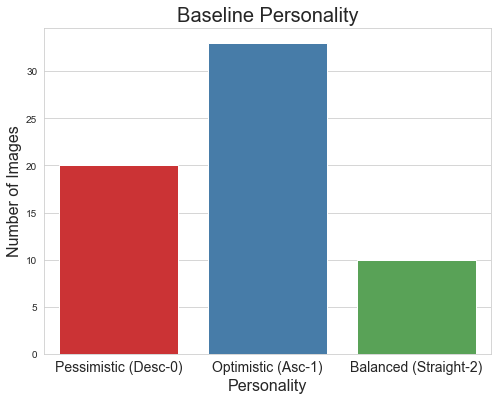

In [24]:
BASELINE_FEATURE = {0:'Pessimistic (Desc-0)', 1:'Optimistic (Asc-1)', 2:'Balanced (Straight-2)'}

baselineValues = nfeatureDF['Baseline']
baselineClasses = nfeatureDF['Baseline'].unique()
#print(baselineClasses)
baselineClasses.sort()
#print(baselineClasses)
baselineLabels = [BASELINE_FEATURE.get(id) for id in baselineClasses]

classCount=pd.DataFrame(nfeatureDF.Baseline.value_counts()).reset_index()
classCount.columns = ['Baseline','Count']
classCount['Feature'] = classCount['Baseline'].map(BASELINE_FEATURE)
print(classCount)
plt.figure(figsize=(8,6))
ax = sns.countplot(baselineValues, order=baselineClasses, palette='Set1')
ax.set_xticklabels(baselineLabels, fontsize=14)
plt.title('Baseline Personality',fontsize=20)
plt.xlabel('Personality', fontsize=16)
plt.ylabel('Number of Images', fontsize=16)
plt.show()

   WordSpacing  Count                       Feature
0            0     35          Independent (Wide-0)
1            2     15  Social Maturity (Balanced-2)
2            1     13          Dependent (Narrow-1)


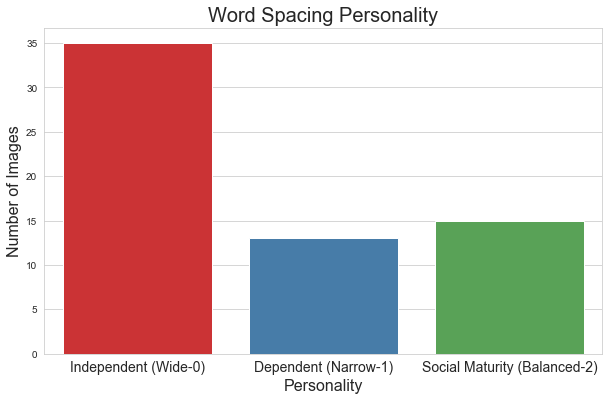

In [25]:
WSPACING_FEATURE = {0:'Independent (Wide-0)', 1:'Dependent (Narrow-1)', 2:'Social Maturity (Balanced-2)'}

wspacingValues = nfeatureDF['WordSpacing']
wspacingClasses = nfeatureDF['WordSpacing'].unique()

wspacingClasses.sort()

wspacingLabels = [WSPACING_FEATURE.get(id) for id in wspacingClasses]

classCount=pd.DataFrame(nfeatureDF.WordSpacing.value_counts()).reset_index()
classCount.columns = ['WordSpacing','Count']
classCount['Feature'] = classCount['WordSpacing'].map(WSPACING_FEATURE)
print(classCount)
plt.figure(figsize=(10,6))
ax = sns.countplot(wspacingValues, order=wspacingClasses, palette='Set1')
ax.set_xticklabels(wspacingLabels, fontsize=14)
plt.title('Word Spacing Personality',fontsize=20)
plt.xlabel('Personality', fontsize=16)
plt.ylabel('Number of Images', fontsize=16)
plt.show()

In [26]:
nfeatureDF.loc[((nfeatureDF.SlantAngle == 0) | (nfeatureDF.SlantAngle == 1)), 'Slant'] = 0
nfeatureDF.loc[((nfeatureDF.SlantAngle == 2) | (nfeatureDF.SlantAngle == 3) | (nfeatureDF.SlantAngle == 4)), 'Slant'] = 1
nfeatureDF.loc[(nfeatureDF.SlantAngle == 5), 'Slant'] = 2
nfeatureDF.loc[(nfeatureDF.SlantAngle == 6), 'Slant'] = 3
nfeatureDF.tail()

,Filename,Baseline,TopMargin,LetterSize,LineSpacing,WordSpacing,PenPressure,SlantAngle,EmotionalStability,WillPower,Modesty,PersonalHarmony,Discipline,Concentration,Communicativeness,SocialIsolation,Slant
58,img6.png,1,0,2,1,0,0,3,1,1,1,0,0,0,0,1,1.0
59,img28.png,1,0,2,1,0,2,6,0,1,1,0,0,0,0,1,3.0
60,img25d.png,0,0,0,2,0,0,0,0,1,1,0,0,0,0,1,0.0
61,img2601.png,2,0,0,0,0,2,2,1,1,1,0,0,0,0,1,1.0
62,img14.png,1,1,0,1,2,0,1,1,1,0,0,0,1,0,0,0.0


   Slant  Count     Feature
0    1.0     34  RightSlant
1    0.0     20  Left Slant
2    3.0      8   Irregular
3    2.0      1    Staright


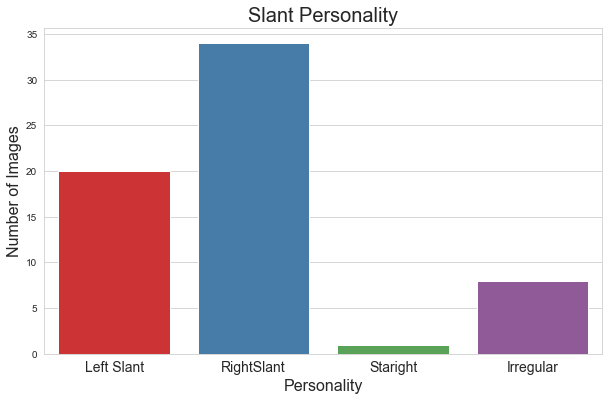

In [27]:


SLANT_FEATURE = {0:'Left Slant', 1:'RightSlant', 2:'Staright', 3:'Irregular'}

slantValues = nfeatureDF['Slant']
slantClasses = nfeatureDF['Slant'].unique()

slantClasses.sort()

slantLabels = [SLANT_FEATURE.get(id) for id in slantClasses]

classCount=pd.DataFrame(nfeatureDF.Slant.value_counts()).reset_index()
classCount.columns = ['Slant','Count']
classCount['Feature'] = classCount['Slant'].map(SLANT_FEATURE)
print(classCount)
plt.figure(figsize=(10,6))
ax = sns.countplot(slantValues, order=slantClasses, palette='Set1')
ax.set_xticklabels(slantLabels, fontsize=14)
plt.title('Slant Personality',fontsize=20)
plt.xlabel('Personality', fontsize=16)
plt.ylabel('Number of Images', fontsize=16)
plt.show()

In [28]:
print("Writing Final Features To File...")
nfeatureDF.to_csv("NewFinalFeatures.csv",index=False)
print("Final Features Saved To File...")

Writing Final Features To File...
Final Features Saved To File...


In [29]:
nfeatureDF = pd.read_csv("NewFinalFeatures.csv")
print("Features Loaded")

Features Loaded


In [30]:
nfeatureDF.head()

,Filename,Baseline,TopMargin,LetterSize,LineSpacing,WordSpacing,PenPressure,SlantAngle,EmotionalStability,WillPower,Modesty,PersonalHarmony,Discipline,Concentration,Communicativeness,SocialIsolation,Slant
0,img5.png,2,0,1,0,0,0,3,1,1,1,0,0,0,1,1,1.0
1,img1501.png,0,0,1,0,0,0,2,0,1,1,0,0,0,1,1,1.0
2,img23d.png,0,0,0,2,0,0,0,0,1,1,0,0,0,0,1,0.0
3,img401.png,1,1,0,1,1,0,2,1,1,0,0,0,1,0,0,1.0
4,img2901.png,1,1,0,0,2,2,2,1,1,0,0,0,0,0,1,1.0


In [31]:
finalData = nfeatureDF[['Filename','Baseline','WordSpacing','Slant']]
finalData.head()

,Filename,Baseline,WordSpacing,Slant
0,img5.png,2,0,1.0
1,img1501.png,0,0,1.0
2,img23d.png,0,0,0.0
3,img401.png,1,1,1.0
4,img2901.png,1,2,1.0
